## Data analysis for predicting future happiness 

- Predict 2023 Happiness Score for all countries 
    - Train with 2015-2020 and test 2021-2022
    - Train again with all and predict 2023
- If a Utopia is considered a 9.5 on the Happiness score and a dystopia is a .5, “which country is on it’s way to becoming the first Utopia?” and “Which country is on it’s way to becoming the first Dystopia?”. Hint: Figure out how each country’s score changes over time and extrapolate using machine learning techniques.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/processed/WorldHappiness2015_2022.csv')
df

,Year,Country,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual,Region
0,2015,Switzerland,1,7.587,0.66557,0.29678,0.94143,0.41978,1.39651,1.422681,2.51738,Western Europe
1,2015,Iceland,2,7.561,0.62877,0.43630,0.94784,0.14145,1.30232,1.461513,2.70201,Western Europe
2,2015,Denmark,3,7.527,0.64938,0.34139,0.87464,0.48357,1.32548,1.403490,2.49204,Western Europe
3,2015,Norway,4,7.522,0.66973,0.34699,0.88521,0.36503,1.45900,1.401235,2.46531,Western Europe
4,2015,Canada,5,7.427,0.63297,0.45811,0.90563,0.32957,1.32629,1.340878,2.45176,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2022,Botswana,142,3.471,0.57100,0.01200,0.28000,0.10200,1.50300,0.815000,0.18700,Sub-Saharan Africa
1226,2022,Rwanda,143,3.268,0.62100,0.18700,0.46200,0.54400,0.78500,0.133000,0.53600,Sub-Saharan Africa
1227,2022,Zimbabwe,144,2.995,0.32900,0.10600,0.27000,0.10500,0.94700,0.690000,0.54800,Sub-Saharan Africa
1228,2022,Lebanon,145,2.955,0.10300,0.08200,0.63100,0.03400,1.39200,0.498000,0.21600,Middle East and Northern Africa


# Forcasting

## Visualization

In [3]:
# Plot in map the Happiness Score per year, to make a gif
# Map
import plotly.graph_objects as go
import pandas as pd

def graph_map(df, label=''):
    fig = go.Figure(data=go.Choropleth(
        locations = df['Country'],
        z = df['Happiness Score'],
        text = df['Country'],
        colorscale = 'Blues',
        locationmode = 'country names',
        autocolorscale=False,
        # reversescale=True,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        # colorbar_tickprefix = '$',
        colorbar_title = 'World Happiness',
    ))

    fig.update_layout(
        title_text=f'{label} World Happiness',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='',
            showarrow = False
        )]
    )

    fig.show()

graph_map(df.groupby('Country').mean().reset_index())

for year in list(df.Year.unique()):
    graph_map(df[df.Year == year], year)

ValueError: min() arg is an empty sequence

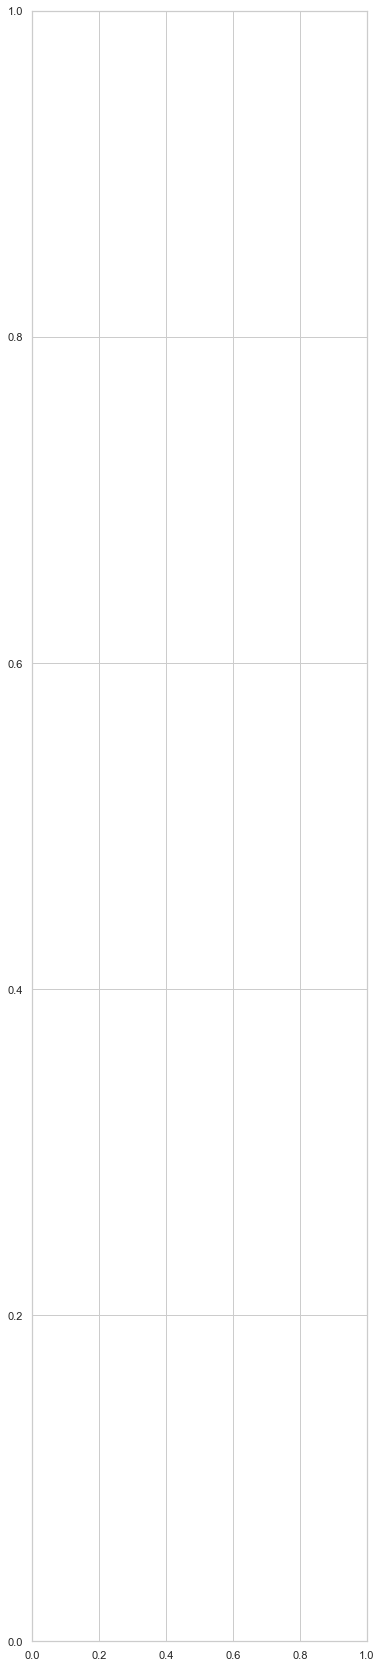

In [4]:
# Plot how much of the Happiness Score can be explained by each feature, and how much can not 
# Horizontal bar
df_2023 = df[df.Year == 2023].copy()

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 30))

# Explained by Freedom	
sns.set_color_codes("pastel")
sns.barplot(x='Freedom', y='Country', data=df_2023,
            label="Freedom", color='b')

# Explained by Generosity	
sns.set_color_codes("muted")
sns.barplot(x='Generosity', y='Country', data=df_2023,
            label="Generosity", color='r')

# Explained by Healthy life expectancy	
sns.set_color_codes("pastel")
sns.barplot(x='Healthy life expectancy', y='Country', data=df_2023,
            label="Healthy life expectancy", color='g')

# Explained by Perceptions of corruption
sns.set_color_codes("pastel")
sns.barplot(x='Perceptions of corruption', y='Country', data=df_2023,
            label="Perceptions of corruption")

# Explained by GDP per capita
sns.set_color_codes("pastel")
sns.barplot(x='GDP per capita', y='Country', data=df_2023,
            label="GDP per capita")

# Explained by Social support
sns.set_color_codes("pastel")
sns.barplot(x='Social support', y='Country', data=df_2023,
            label="Social support")

# Add a legend and informative axis label
ax.legend(ncol=6, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="",
       xlabel="World Happiness")
sns.despine(left=True, bottom=True)